# Homework 3 for Perspective Winter 2020
### Qian Zhang

### 5.1

In [ ]:
# 最后一期的w2 wt+1

The problem could be written as:

$$\max \limits_{W_{2}\in[0, W_1]}\ u(W_1-W_2)$$

The optimal solution would be 

$$W_{2} = min (W_{2}) = 0$$

### 5.2

The condition that characterizes the optimal amount of cake to leave for the next period $W_3$ in period 2 is

$$\max \limits_{W_{3}\in[0, W_2]}\ u(W_2-W_3)$$

To optimize the utility,

$$W_{3} = min (W_{3}) = 0 $$

Then the condition that characterizes the optimal amount of cake leave for the next period $W_2$ in period 1 is

$$\max \limits_{W_{2}\in[0, W_1]}\ [u(W_1-W_2) + \max \limits_{W_{3}\in[0, W_2]}\beta u(W_2-W_3)]$$

The FOC will be 

$$-u^{'} (W_1-W_2) + \beta u^{'} (W_2-W_3) = 0$$

In [ ]:
# beta 贴现率，未来越远权重越低

### 5.3

The condition that characterizes the optimal amount of cake to leave for the next period $W_4$ in period 3 is

$$\max \limits_{W_{4}\in[0, W_3]}\ u(W_3-W_4)$$

The condition that characterizes the optimal amount of cake to leave for the next period $W_3$ in period 2 is

$$\max \limits_{W_{3}\in[0, W_2]}\ [u(W_2-W_3) + \max \limits_{W_{4}\in[0, W_3]}\beta u(W_3-W_4)]$$

The condition that characterizes the optimal amount of cake to leave for the next period $W_2$ in period 1 is

$$\max \limits_{W_2\in[0,W_1]}\{u(W_1-W_2)+\max \limits_{W_3\in[0,W_2]}\beta [u(W_2-W_3)+\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)]\}$$



Given the conditions in the question, we begin to solve the maximization problem backward, and $W_{4} = min (W_{4})=0$. And if we calculate the FOC of the formula with respect to $W_2$ and $W_3$ in period 1, both of them should be equal to 0 as

$$-u^{'} (W_1-W_2) + \beta u^{'} (W_2-W_3) = 0$$

and

$$-\beta u^{'} (W_2-W_3) + \beta^2 u^{'} (W_3-W_4) = 0$$

Given the utility function as $u(x)=ln(x)$, $\beta=0.9$ and $W_1$=1. we could then calculate that the optimal $W_3$=0.299, $W_2$=0.631. Therefore, $c_1=W_1-W_2$=0.369, $c_2=W_2-W_3$=0.332, and $c_3=W_3-W_4$=0.299. 

In [1]:
import numpy as np
import scipy.optimize as opt
import sympy as sy
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

In [11]:
T=[1,2,3,4]
x=sy.symbols('x')
u=sy.log(x)
ux=sy.diff(u,x)

ux2=sy.lambdify(x,ux)

um=lambda x: ux2(1-x)+0.9*ux2(x)

opt.root(um,0.2)

    fjac: array([[-1.]])
     fun: array([3.79736942])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([-3.79741128])
       r: array([0.05213475])
  status: 5
 success: False
       x: array([0.48726405])

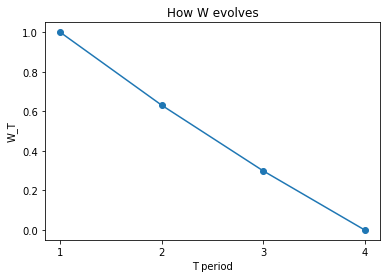

In [12]:
T=[1,2,3,4]
c=[0.369,0.332,0.299]
W=[1,0.631,0.299,0]

# plot w
plt.plot(T,W,'-o') # 这也是一种样式

#可以决定xstick的起点终点

plt.xticks([1,2,3,4])
plt.xlabel('T period')
plt.ylabel('W_T')
plt.title('How W evolves')
plt.show()

Text(0.5, 1.0, 'How c evolves')

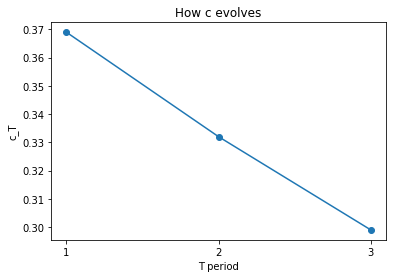

In [3]:
# plot c

plt.plot([1,2,3],c,'-o')
plt.xticks([1,2,3])
plt.xlabel('T period')
plt.ylabel('c_T')
plt.title('How c evolves')

### 5.4

The value function for $T-1$ will be

$$V_{T-1}(W_{T-1})=\max \limits_{W_T} u(W_{T-1}-W_T)+ \beta u(W_T) $$

So the condition that characterizes the optimal choice (the policy function) in period $T - 1$ for $W_T = \psi_{T-1}(W_{T-1})$ is (by taking FOC)

$$-u^{'} (W_{T-1}-W_T) + \beta u^{'} (W_T) =0$$

And if we plug in the policy function of $W_T$, we have

$$-u^{'} [W_{T-1}-\psi_{T-1} (W_{T-1})] + \beta u^{'} [\psi_{T-1} (W_{T-1})] =0$$

And the value function $V_{T-1}$ will be

$$V_{T-1}(W_{T-1})= u[W_{T-1}-\psi_{T-1} (W_{T-1})]+ \beta u[\psi_{T-1} (W_{T-1})] $$

### 5.5

We have

$$\psi_{T} (\bar{W}) = 0$$

and

$$V_{T} (\bar{W}) = u(\bar{W})$$

According to FOC and given $u(x)=ln(x)$,

$$W_{T}=\frac{\beta \bar{W}}{1+ \beta}$$

Therefore, 

$$\psi_{T-1} (\bar{W}) = W_{T} \neq 0 = \psi_{T} (\bar{W})$$

and

$$V_{T-1} (\bar{W}) = ln(\frac{\beta \bar{W}}{1+ \beta})+\beta ln(\frac{\beta \bar{W}}{1+ \beta}) \neq ln(\bar{W}) = V_{T} (\bar{W})$$


### 5.6

Given $u(c)=ln(c)$, the finite horizon Bellman equation for the value function at time $T - 2$ is 

$$V_{T-2}(W_{T-2}) \equiv \max \limits_{W_{T-1}\in [0, W_{T-2}]} ln(W_{T-2}-W_{T-1}) + \beta V_{T-1} (W_{T-1})$$

which is equal to

$$V_{T-2}(W_{T-2}) \equiv \max \limits_{W_{T-1}\in [0, W_{T-2}]} ln(W_{T-2}-W_{T-1}) + \beta ln(W_{T-1}-W_{T}) + \beta^{2} ln(W_{T})$$

Then if we take the FOC (we already get $W_T$ in the previous questions as $\frac{\beta W_{T-1}}{1+\beta}$), 

$$-\frac{1}{W_{T-2}-W_{T-1}} + \beta \frac{1}{W_{T-1}-W_{T}} = 0$$

And we get 

$$\psi_{T-2} (W_{T-2}) = \frac{\beta + \beta^{2}}{1 + \beta + \beta^{2}} W_{T-2}$$

And the analytical solution for $V_{T-2}$ is

$$V_{T-2} (W_{T-2}) = \ln \left(\frac{W_{T-2}}{1+\beta+\beta^{2}}\right)+\beta\ln \left(\frac{\beta W_{T-2}}{1+\beta+\beta^{2}}\right)+\beta^{2} \ln\left(\frac{\beta^{2}W_{T-2}}{1+\beta+\beta^{2}}\right)$$

### 5.7

Be induction, we could write the expressions for the analytical solutions as

$$\psi_{T-s}(W_{T-s})=\frac{\sum\limits_{i=1}^{s}\beta^{i}}{\sum\limits_{j=0}^{s}\beta^{i}}W_{T-s}$$

and 

$$V_{T-s}(W_{T-s})=\sum\limits_{i=0}^{s} \beta^{i}ln\left(\frac{\beta^{i}W_{T-s}}{\sum\limits_{j=0}^{s}\beta^{j}}\right)$$

When $s$ goes to infinity,

$$\lim_{s\rightarrow \infty}\frac{\sum\limits_{i=1}^{s}\beta^{i}}{\sum\limits_{j=0}^{s}\beta^{j}}=\beta$$

and

$$\lim_{s\rightarrow\infty}\frac{\sum\limits_{i=1}^{s}\beta^{i}}{\sum\limits_{j=0}^{s}\beta^{i}}W_{T-s}=\psi(W_{T-s})=\beta W_{T-s}$$

And for the value function,

$$ \lim _{s \rightarrow \infty} V_{T-s}\left(W_{T-s}\right)=V\left(W_{T-s}\right) = \left(\frac{1}{1-\beta}\right) \ln \left((1-\beta){ W_{T-s}}\right)+\frac{\beta}{(1-\beta)^{2}} \ln (\beta) $$

In [ ]:
# A=ibi, B=bA

### 5.8

The Bellman equation for the cake eating problem with a general utility function $u(c)$ when the horizon is infinite is

$$ V(W) = \max_{w\in [0,W]} u(W-w) + \beta V(w) $$


### 5.9

In [14]:
# create w vector

W_max=1
W_min=0.01
N=100
W=np.linspace(W_min,W_max,N)
W

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [17]:
c_mat = W.reshape(N, -1) - W
c_mat

array([[ 0.  , -0.01, -0.02, ..., -0.97, -0.98, -0.99],
       [ 0.01,  0.  , -0.01, ..., -0.96, -0.97, -0.98],
       [ 0.02,  0.01,  0.  , ..., -0.95, -0.96, -0.97],
       ...,
       [ 0.97,  0.96,  0.95, ...,  0.  , -0.01, -0.02],
       [ 0.98,  0.97,  0.96, ...,  0.01,  0.  , -0.01],
       [ 0.99,  0.98,  0.97, ...,  0.02,  0.01,  0.  ]])

### 5.10

In [19]:
#utility

def utility(c):
    return np.log(c)

N=100
beta=0.9

#set v_T+1

# vt+1 是0 因为wt+1是0

v_prime=np.zeros((N,N))

#calc u(w-w')

#前半部分是w，先变成n行1列用reshape，然后tile复制n列。后者是w‘

c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W,(N,1)))

# 因为log《=0不行，所以换成1e-10

c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)

# 这个与cdif的条件相同

v_prime[~c_pos]=-1e10

#calc value func and max

u_matrix=u_dif
v_matrix=v_prime

vf=u_matrix+beta*v_matrix

#取每一行最大的

vf_max=vf.max(axis=1)

# 按行找这个v max的值所在的位置 equi to 找是第几个w‘

ind_max=np.argmax(u_matrix+beta*v_matrix,axis=1)

print(ind_max)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


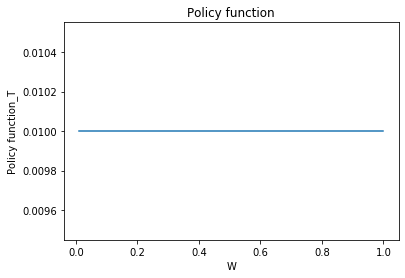

In [6]:
#output of policy function
# To save space, print row vector instead of column vector.

# 对应w’的值输出

print(W[ind_max])

# policy func里面w‘是关于w的函数 psi（w)=w'

plt.plot(W,W[ind_max])
plt.title("Policy function")
plt.xlabel('W')
plt.ylabel('Policy function_T')
plt.show()

[-9.00000002e+09 -4.60517019e+00 -3.91202301e+00 -3.50655790e+00
 -3.21887582e+00 -2.99573227e+00 -2.81341072e+00 -2.65926004e+00
 -2.52572864e+00 -2.40794561e+00 -2.30258509e+00 -2.20727491e+00
 -2.12026354e+00 -2.04022083e+00 -1.96611286e+00 -1.89711998e+00
 -1.83258146e+00 -1.77195684e+00 -1.71479843e+00 -1.66073121e+00
 -1.60943791e+00 -1.56064775e+00 -1.51412773e+00 -1.46967597e+00
 -1.42711636e+00 -1.38629436e+00 -1.34707365e+00 -1.30933332e+00
 -1.27296568e+00 -1.23787436e+00 -1.20397280e+00 -1.17118298e+00
 -1.13943428e+00 -1.10866262e+00 -1.07880966e+00 -1.04982212e+00
 -1.02165125e+00 -9.94252273e-01 -9.67584026e-01 -9.41608540e-01
 -9.16290732e-01 -8.91598119e-01 -8.67500568e-01 -8.43970070e-01
 -8.20980552e-01 -7.98507696e-01 -7.76528789e-01 -7.55022584e-01
 -7.33969175e-01 -7.13349888e-01 -6.93147181e-01 -6.73344553e-01
 -6.53926467e-01 -6.34878272e-01 -6.16186139e-01 -5.97837001e-01
 -5.79818495e-01 -5.62118918e-01 -5.44727175e-01 -5.27632742e-01
 -5.10825624e-01 -4.94296

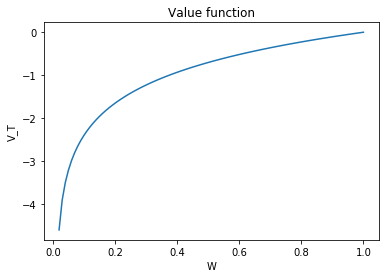

In [7]:
# To save space, print row vector instead of column vector.
# When drawing the functions, to make the figure more beautiful, drop the first plot.

#在初始w不同的时候v是什么样的

print(vf_max)
plt.plot(W[1:],vf_max[1:])
plt.title("Value function")
plt.xlabel('W')
plt.ylabel('V_T')
plt.show()

### 5.11

In [8]:
# 距离=d的转制*d=d1^2+d2^2+....

def distance(v1,v2):
    return ((v1-v2)**2).sum()
v_prime=np.zeros(N)
v_t=vf_max
print ('The distance between V_T and V_T+1 is {}.'.format(distance(v_t,v_prime)))
d_t=distance(v_t,v_prime)

The distance between V_T and V_T+1 is 8.100000041446531e+19.


### 5.12

In [9]:
v_t=vf_max # 其实应该是列向量

c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W,(N,1)))
c_pos=c_dif>0
c_neg=c_dif<0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)

# 对上一个vt+1，先变成行向量，在复制n列

v_prime=np.tile(v_t.reshape((1,N)),(N,1))

v_prime[~c_pos]=-1e10

v_t_1=u_dif+beta*v_prime

# 这边axis=1 是代表行

v_t_1_max=v_t_1.max(axis=1)

ind_t_1=np.argmax(v_t_1,axis=1)

# To save space, print row vector instead of column vector.

W[ind_t_1]

array([0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06,
       0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.1 , 0.11,
       0.11, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.16, 0.16,
       0.17, 0.17, 0.18, 0.18, 0.19, 0.19, 0.19, 0.2 , 0.2 , 0.21, 0.21,
       0.22, 0.22, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.26, 0.26, 0.27,
       0.27, 0.28, 0.28, 0.28, 0.29, 0.29, 0.3 , 0.3 , 0.31, 0.31, 0.32,
       0.32, 0.33, 0.33, 0.34, 0.34, 0.35, 0.35, 0.36, 0.36, 0.37, 0.37,
       0.37, 0.38, 0.38, 0.39, 0.39, 0.4 , 0.4 , 0.41, 0.41, 0.42, 0.42,
       0.43, 0.43, 0.44, 0.44, 0.45, 0.45, 0.46, 0.46, 0.46, 0.47, 0.47,
       0.48])

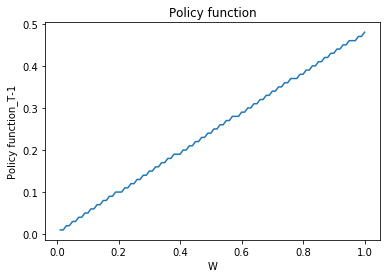

In [10]:
plt.plot(W,W[ind_t_1])
plt.title("Policy function")
plt.xlabel('W')
plt.ylabel('Policy function_T-1')
plt.show()

[-9.00000002e+09 -8.10000003e+09 -8.74982335e+00 -8.05667617e+00
 -7.43284371e+00 -7.02737860e+00 -6.66246000e+00 -6.37477793e+00
 -6.11586407e+00 -5.89272052e+00 -5.69189132e+00 -5.50956976e+00
 -5.34548036e+00 -5.19132968e+00 -5.05259407e+00 -4.91906268e+00
 -4.79888442e+00 -4.68110139e+00 -4.57509666e+00 -4.46973614e+00
 -4.37442596e+00 -4.27960150e+00 -4.19259012e+00 -4.10681096e+00
 -4.02676825e+00 -3.94845801e+00 -3.87435004e+00 -3.80231160e+00
 -3.73331873e+00 -3.66662156e+00 -3.60208303e+00 -3.53998945e+00
 -3.47936483e+00 -3.42128016e+00 -3.36412175e+00 -3.30955959e+00
 -3.25549236e+00 -3.20404979e+00 -3.15275650e+00 -3.10396633e+00
 -3.05530583e+00 -3.00878582e+00 -2.96262185e+00 -2.91817009e+00
 -2.87425894e+00 -2.83169933e+00 -2.78983132e+00 -2.74900932e+00
 -2.70900273e+00 -2.66978202e+00 -2.63147837e+00 -2.59373804e+00
 -2.55699824e+00 -2.52063060e+00 -2.48533196e+00 -2.45024064e+00
 -2.41627434e+00 -2.38237279e+00 -2.34958297e+00 -2.31685209e+00
 -2.28510339e+00 -2.25352

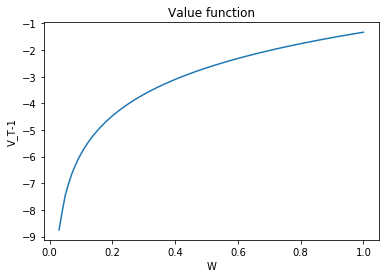

In [11]:
# To save space, print row vector instead of column vector.
# When drawing the functions, to make the figure more beautiful, drop the first two plots.

print(v_t_1_max)
plt.plot(W[2:],v_t_1_max[2:])
plt.title("Value function")
plt.xlabel('W')
plt.ylabel('V_T-1')
plt.show()

In [12]:
#Distance between the two value functions

print("Distance between V_T+1 and V_T:",d_t)
print("Distance between V_T and V_T-1:",distance(v_t,v_t_1_max))
d_t_1=distance(v_t,v_t_1_max)
print("Distance of two value functions goes down.")

Distance between V_T+1 and V_T: 8.100000041446531e+19
Distance between V_T and V_T-1: 6.56100003357169e+19
Distance of two value functions goes down.


### 5.13

In [13]:
v_t_1=v_t_1_max

c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W,(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)

v_prime=np.tile(v_t_1.reshape((1,N)),(N,1))
v_prime[~c_pos]=-1e10

v_t_2=u_dif+beta*v_prime

v_t_2_max=v_t_2.max(axis=1)
ind_t_2=np.argmax(v_t_2,axis=1)

# To save space, print row vector instead of column vector.

W[ind_t_2]

array([0.01, 0.01, 0.02, 0.03, 0.03, 0.04, 0.05, 0.05, 0.06, 0.07, 0.07,
       0.08, 0.09, 0.09, 0.1 , 0.1 , 0.11, 0.12, 0.12, 0.13, 0.14, 0.14,
       0.15, 0.16, 0.16, 0.17, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 , 0.21,
       0.22, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.26, 0.27, 0.28, 0.28,
       0.29, 0.29, 0.3 , 0.31, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.35,
       0.36, 0.36, 0.37, 0.37, 0.38, 0.39, 0.39, 0.4 , 0.41, 0.41, 0.42,
       0.43, 0.43, 0.44, 0.45, 0.45, 0.46, 0.46, 0.47, 0.48, 0.48, 0.49,
       0.5 , 0.5 , 0.51, 0.52, 0.52, 0.53, 0.53, 0.54, 0.55, 0.55, 0.56,
       0.56, 0.57, 0.58, 0.58, 0.59, 0.6 , 0.6 , 0.61, 0.62, 0.62, 0.63,
       0.64])

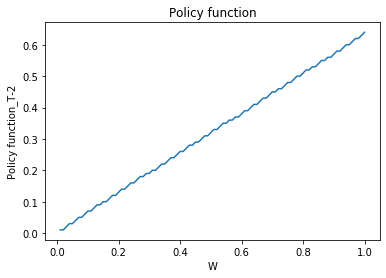

In [14]:
plt.plot(W,W[ind_t_2])
plt.title("Policy function")
plt.xlabel('W')
plt.ylabel('Policy function_T-2')
plt.show()

[-9.00000002e+09 -8.10000003e+09 -7.29000003e+09 -1.24800112e+01
 -1.17868640e+01 -1.11630316e+01 -1.06015823e+01 -1.01961172e+01
 -9.83119864e+00 -9.50277190e+00 -9.21508983e+00 -8.95617596e+00
 -8.72315349e+00 -8.50000993e+00 -8.29918074e+00 -8.11685918e+00
 -7.93611290e+00 -7.77202350e+00 -7.61787282e+00 -7.47019236e+00
 -7.33145675e+00 -7.19792536e+00 -7.07306331e+00 -6.95288505e+00
 -6.83510202e+00 -6.72694159e+00 -6.62093686e+00 -6.51557634e+00
 -6.42017208e+00 -6.32486190e+00 -6.23003744e+00 -6.14302606e+00
 -6.05724690e+00 -5.97190488e+00 -5.89186218e+00 -5.81355194e+00
 -5.73635069e+00 -5.66224272e+00 -5.59020428e+00 -5.51972507e+00
 -5.45073219e+00 -5.38403502e+00 -5.31920043e+00 -5.25466191e+00
 -5.19256832e+00 -5.13194370e+00 -5.07191624e+00 -5.01383157e+00
 -4.95667316e+00 -4.90078893e+00 -4.84622677e+00 -4.79215955e+00
 -4.73988335e+00 -4.68844078e+00 -4.63714748e+00 -4.58804154e+00
 -4.53925138e+00 -4.49059088e+00 -4.44407086e+00 -4.39777255e+00
 -4.35160858e+00 -4.30715

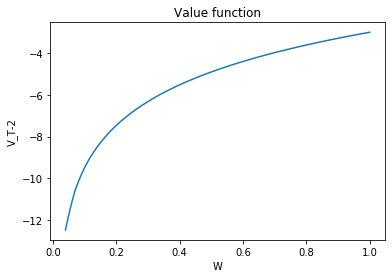

In [15]:
# To save space, print row vector instead of column vector.
# When drawing the functions, to make the figure more beautiful, drop the first three plots.

print(v_t_2_max)
plt.plot(W[3:],v_t_2_max[3:])
plt.title("Value function")
plt.xlabel('W')
plt.ylabel('V_T-2')
plt.show()

In [16]:
print("Distance between V_T+1 and V_T:",d_t)
print("Distance between V_T and V_T-1:",d_t_1)
print("Distance at between V_T-1 and V_T-2:",distance(v_t_1,v_t_2_max))
print("Distance of two value functions still goes down.")

Distance between V_T+1 and V_T: 8.100000041446531e+19
Distance between V_T and V_T-1: 6.56100003357169e+19
Distance at between V_T-1 and V_T-2: 5.314410027193069e+19
Distance of two value functions still goes down.


### 5.14

Iter 1: Distance = 8.100000041446531e+19
Iter 2: Distance = 6.56100003357169e+19
Iter 3: Distance = 5.314410027193069e+19
Iter 4: Distance = 4.304672122026387e+19
Iter 5: Distance = 3.486784418841374e+19
Iter 6: Distance = 2.824295379261513e+19
Iter 7: Distance = 2.2876792572018258e+19
Iter 8: Distance = 1.853020198333479e+19
Iter 9: Distance = 1.5009463606501175e+19
Iter 10: Distance = 1.2157665521265955e+19
Iter 11: Distance = 9.847709072225423e+18
Iter 12: Distance = 7.976644348502596e+18
Iter 13: Distance = 6.461081922287103e+18
Iter 14: Distance = 5.233476357052553e+18
Iter 15: Distance = 4.239115849212569e+18
Iter 16: Distance = 3.4336838378621814e+18
Iter 17: Distance = 2.7812839086683674e+18
Iter 18: Distance = 2.2528399660213778e+18
Iter 19: Distance = 1.8248003724773166e+18
Iter 20: Distance = 1.4780883017066266e+18
Iter 21: Distance = 1.197251524382368e+18
Iter 22: Distance = 9.697737347497179e+17
Iter 23: Distance = 7.855167251472716e+17
Iter 24: Distance = 6.36268547369289

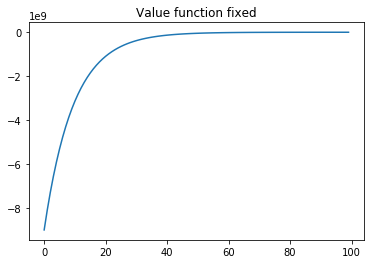

In [17]:
# before the loop

W=np.linspace(0.01, 1, 100)
c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W,(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)

N=100
beta=0.9
dist=1

# set the maximum iteration as 1000, using i

i=0

# set the initial v_prime from T+1
v_current=np.zeros((1,N))

while i<=1000 and dist>1e-9:
    
    i+=1
    v_prime=np.tile(v_current,(N,1))
    v_prime[~c_pos]=-1e10
    vf=u_dif+beta*v_prime
    vf_max=vf.max(axis=1)
    v_new=vf_max.copy()
    ind=np.argmax((u_dif+beta*v_prime),axis=1)
    dist=distance(v_current, v_new)
    print ('Iter {}: Distance = {}'.format(i,dist))
    v_current=v_new
plt.title('Value function fixed')
plt.plot(v_new)

It takes 101 iterations and it converges to the fixed point.

### 5.15

The converged policy function is:

Text(0.5, 1.0, 'Converged policy function')

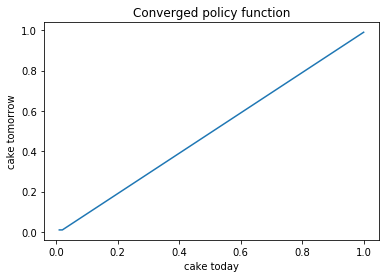

In [18]:
plt.plot(W,W[ind])
plt.xlabel('cake today')
plt.ylabel('cake tomorrow')
plt.title('Converged policy function')

### 5.16

In [21]:
M=7

from scipy import integrate

# retrieved from assignment 2

# 取epsilon的点，保证要等于1

def func_normal(mean,sd,n,k): 
    from scipy.stats import norm
    weight=[]
    node=[]
    left=mean-k*sd
    right=mean+k*sd
    z=np.linspace(left,right,n)
    
    #z1
    node.append(z[0])
    weight.append(norm.cdf((z[0]+z[1])/2,mean,sd))
    
    #z2-z_n-1
    for i in range(1,n-1):
        node.append(z[i])
        zmin=(z[i-1]+z[i])/2
        zmax=(z[i]+z[i+1])/2
        def normalfunc(x):
            return norm.pdf(x,mean,sd)
        weight.append(norm.cdf(zmax,mean,sd)-norm.cdf(zmin,mean,sd))
        
    #zn
    node.append(z[-1])
    weight.append(1-norm.cdf((z[-1]+z[-2])/2,mean,sd))
    
    return weight


sd=np.sqrt(0.25)
mu=4*sd
pt=np.linspace(mu-3*sd,mu+3*sd,M)
f_pdf=np.array(func_normal(mu,sd,7,3))
print(f_pdf)
print('sum is {}'.format(np.sum(f_pdf)))

[0.00620967 0.06059754 0.24173034 0.38292492 0.24173034 0.06059754
 0.00620967]
sum is 1.0


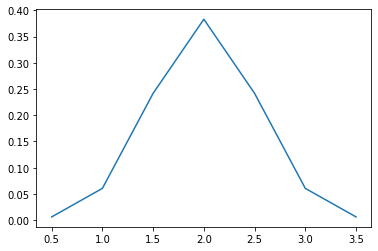

In [22]:
#plot

plt.plot(pt,f_pdf)

### 5.17

In [24]:
from matplotlib import cm

N=100
M=7

#u(w-w')

W=np.linspace(0.01, 1, 100)

# 左边那一个面

c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W,(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)

# eps

u_3d=np.array([u_dif*i for i in pt])


# calc expectation 这是处理vt+1的

#正面的那个面

v_prime=np.zeros((N,M))

# 这个面点乘epsilon 变成列向量，即每一行的期望

ev_prime=v_prime.dot(f_pdf.reshape((M,1)))

#变成行（左边的一行即1*1*n， 然后复制n行 形成左边的一面

ev_prime_matrix=np.tile(ev_prime.reshape((1,N)), (N,1))

#处理w’》w的

ev_prime_matrix[~c_pos]=-1e10

# 把左边的一面往右复制m面

ev_prime_3d=np.array([ev_prime_matrix for i in range(M)])

#计算v func

v_t_3d=u_3d+beta*ev_prime_3d

print (v_t_3d)
#calc the max

v_t_sol= np.zeros((N,M))
w_t_sol = np.zeros((N,M))

for i in range(N):
    
    # 选第二维的，很多个正面，这个v3d的dimension顺序是w*w‘*eps
    
    v_t_3d_1= v_t_3d[:, i, :]
    
    # 找最大的一个面
    
    v_t_sol[i]=v_t_3d_1.max(axis=1)
    
    ind = np.argmax(v_t_3d_1, axis=1)
    w_t_sol[i]=W[ind]

[[[-9.00000001e+09 -9.00000001e+09 -9.00000001e+09 ... -9.00000001e+09
   -9.00000001e+09 -9.00000001e+09]
  [-2.30258509e+00 -9.00000001e+09 -9.00000001e+09 ... -9.00000001e+09
   -9.00000001e+09 -9.00000001e+09]
  [-1.95601150e+00 -2.30258509e+00 -9.00000001e+09 ... -9.00000001e+09
   -9.00000001e+09 -9.00000001e+09]
  ...
  [-1.52296037e-02 -2.04109973e-02 -2.56466472e-02 ... -9.00000001e+09
   -9.00000001e+09 -9.00000001e+09]
  [-1.01013537e-02 -1.52296037e-02 -2.04109973e-02 ... -2.30258509e+00
   -9.00000001e+09 -9.00000001e+09]
  [-5.02516793e-03 -1.01013537e-02 -1.52296037e-02 ... -1.95601150e+00
   -2.30258509e+00 -9.00000001e+09]]

 [[-9.00000002e+09 -9.00000002e+09 -9.00000002e+09 ... -9.00000002e+09
   -9.00000002e+09 -9.00000002e+09]
  [-4.60517019e+00 -9.00000002e+09 -9.00000002e+09 ... -9.00000002e+09
   -9.00000002e+09 -9.00000002e+09]
  [-3.91202301e+00 -4.60517019e+00 -9.00000002e+09 ... -9.00000002e+09
   -9.00000002e+09 -9.00000002e+09]
  ...
  [-3.04592075e-02 -4.0

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 

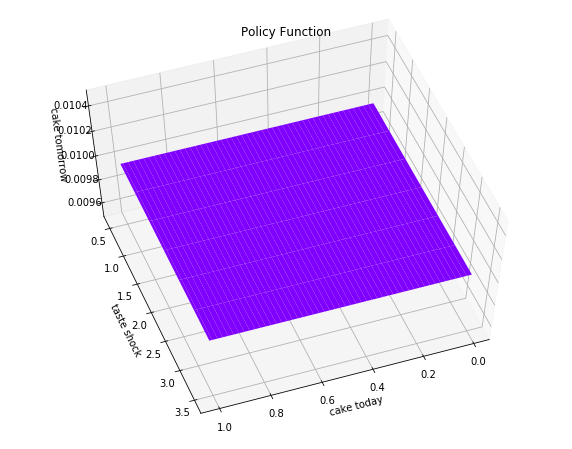

In [25]:
# plot the policy function

print(w_t_sol)

# 如何画3d的图

X, Y = np.meshgrid(W, pt)

new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, w_t_sol,cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Policy Function") 
new_ax.view_init(elev=60,azim=70)


[[-9.00000001e+09 -9.00000002e+09 -9.00000003e+09 -9.00000005e+09
  -9.00000006e+09 -9.00000007e+09 -9.00000008e+09]
 [-2.30258509e+00 -4.60517019e+00 -6.90775528e+00 -9.21034037e+00
  -1.15129255e+01 -1.38155106e+01 -1.61180957e+01]
 [-1.95601150e+00 -3.91202301e+00 -5.86803451e+00 -7.82404601e+00
  -9.78005751e+00 -1.17360690e+01 -1.36920805e+01]
 [-1.75327895e+00 -3.50655790e+00 -5.25983685e+00 -7.01311579e+00
  -8.76639474e+00 -1.05196737e+01 -1.22729526e+01]
 [-1.60943791e+00 -3.21887582e+00 -4.82831374e+00 -6.43775165e+00
  -8.04718956e+00 -9.65662747e+00 -1.12660654e+01]
 [-1.49786614e+00 -2.99573227e+00 -4.49359841e+00 -5.99146455e+00
  -7.48933068e+00 -8.98719682e+00 -1.04850630e+01]
 [-1.40670536e+00 -2.81341072e+00 -4.22011608e+00 -5.62682143e+00
  -7.03352679e+00 -8.44023215e+00 -9.84693751e+00]
 [-1.32963002e+00 -2.65926004e+00 -3.98889006e+00 -5.31852007e+00
  -6.64815009e+00 -7.97778011e+00 -9.30741013e+00]
 [-1.26286432e+00 -2.52572864e+00 -3.78859297e+00 -5.05145729e+0

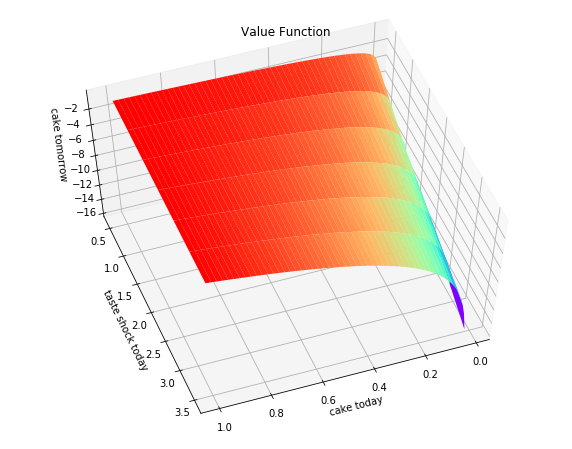

In [23]:
# plot the value function
# When drawing the functions, to make the figure more beautiful, drop the first plot.

print(v_t_sol)

X, Y = np.meshgrid(W[1:], pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, v_t_sol[1:],cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock today')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Value Function") 
new_ax.view_init(elev=60,azim=70)

### 5.18

In [24]:
# 和2d其实是一样的

def dist_3d(v1,v2):
    return np.sum((v1-v2) ** 2)
d_t=dist_3d(v_t_sol,v_prime)
print ('The distance between V_T+1 and V_T is: ',d_t)

The distance between V_T+1 and V_T is:  5.6700000580251445e+20


### 5.19

In [25]:
#u(w-w')

W=np.linspace(0.01, 1, 100)
c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W.reshape((1,N)),(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)
u_3d=np.array([u_dif*i for i in pt])


# calc expectation


v_prime=v_t_sol # 继承上一个的vt


ev_prime=v_prime.dot(f_pdf.reshape((M,1)))
ev_prime_matrix=np.tile(ev_prime.reshape((1,N)), (N,1))
ev_prime_matrix[~c_pos]=-1e10
ev_prime_3d=np.array([ev_prime_matrix for i in range(M)])
v_t_1_3d=u_3d+beta*ev_prime_3d

#calc the max

v_t_1_sol= np.zeros((N,M))
w_t_1_sol = np.zeros((N,M))

for i in range(N):
    v_t_1_3d_1= v_t_1_3d[:, i, :]
    v_t_1_sol[i]=v_t_1_3d_1.max(axis=1)
    ind = np.argmax(v_t_1_3d_1, axis=1)
    w_t_1_sol[i]=W[ind]

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.02 0.02 0.02 0.02]
 [0.04 0.04 0.03 0.03 0.03 0.03 0.02]
 [0.05 0.04 0.04 0.03 0.03 0.03 0.03]
 [0.06 0.05 0.04 0.04 0.04 0.03 0.03]
 [0.06 0.05 0.05 0.04 0.04 0.04 0.03]
 [0.07 0.06 0.05 0.05 0.04 0.04 0.04]
 [0.08 0.07 0.06 0.05 0.05 0.04 0.04]
 [0.09 0.07 0.06 0.06 0.05 0.05 0.04]
 [0.1  0.08 0.07 0.06 0.06 0.05 0.05]
 [0.1  0.09 0.08 0.07 0.06 0.06 0.05]
 [0.11 0.09 0.08 0.07 0.06 0.06 0.05]
 [0.12 0.1  0.09 0.08 0.07 0.06 0.06]
 [0.13 0.11 0.09 0.08 0.07 0.07 0.06]
 [0.14 0.11 0.1  0.09 0.08 0.07 0.06]
 [0.14 0.12 0.1  0.09 0.08 0.07 0.07]
 [0.15 0.13 0.11 0.1  0.09 0.08 0.07]
 [0.16 0.13 0.11 0.1  0.09 0.08 0.07]
 [0.17 0.14 0.12 0.1  0.09 0.09 0.08]
 [0.17 0.14 0.12 0.11 0.1  0.09 0.08]
 [0.18 0.15 0.13 0.11 0.1  0.09 0.08]
 [0.19 0.16 0.14 0.12 0.11 0.1  0.09]
 [0.2  0.16 0.14 0.12 0.11 0.1  0.09]
 [0.21 0.17 0.15 0.13 0.11 0.1  0.09]
 [0.21 0.18 

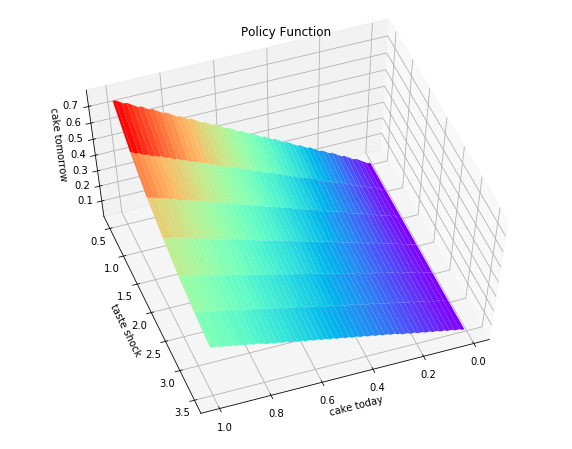

In [26]:
# plot the policy function

print(w_t_1_sol)

X, Y = np.meshgrid(W, pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, w_t_1_sol,cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Policy Function") 
new_ax.view_init(elev=60,azim=70)

[[-9.00000001e+09 -9.00000002e+09 -9.00000003e+09 -9.00000005e+09
  -9.00000006e+09 -9.00000007e+09 -9.00000008e+09]
 [-8.10000004e+09 -8.10000005e+09 -8.10000005e+09 -8.10000005e+09
  -8.10000005e+09 -8.10000006e+09 -8.10000006e+09]
 [-1.05918914e+01 -1.28944765e+01 -1.51970616e+01 -1.74996467e+01
  -1.98022318e+01 -2.21048169e+01 -2.44074020e+01]
 [-9.34422650e+00 -1.16468116e+01 -1.39493967e+01 -1.61133523e+01
  -1.80693638e+01 -2.00253754e+01 -2.19813869e+01]
 [-8.61438931e+00 -1.09169744e+01 -1.29096759e+01 -1.48656874e+01
  -1.68216989e+01 -1.87777104e+01 -2.05622590e+01]
 [-8.09656158e+00 -1.02238272e+01 -1.21798387e+01 -1.40547572e+01
  -1.58080362e+01 -1.75613151e+01 -1.93145941e+01]
 [-7.69490319e+00 -9.70599949e+00 -1.15716411e+01 -1.33249200e+01
  -1.50781990e+01 -1.66982689e+01 -1.83077068e+01]
 [-7.34832960e+00 -9.30053438e+00 -1.10538133e+01 -1.27495559e+01
  -1.43589938e+01 -1.59684317e+01 -1.75267044e+01]
 [-7.02015079e+00 -8.89887599e+00 -1.06222902e+01 -1.22317281e+0

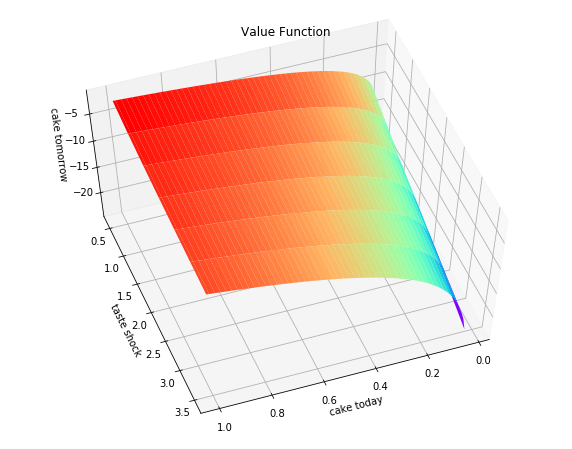

In [27]:
# plot the value function

print(v_t_1_sol)

# When drawing the functions, to make the figure more beautiful, drop the first two plots.

X, Y = np.meshgrid(W[2:], pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, v_t_1_sol[2:],cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Value Function") 
new_ax.view_init(elev=60,azim=70)

In [28]:
# distance_new
d_t_1=dist_3d(v_t_sol,v_t_1_sol)
d_t_1
print('Distance between V_T+1 and V_T is ', d_t)
print('Distance between V_T and V_T-1 is ', d_t_1)
print('The distance decreases.')

Distance between V_T+1 and V_T is  5.6700000580251445e+20
Distance between V_T and V_T-1 is  4.592700047000368e+20
The distance decreases.


### 5.20

In [29]:
#u(w-w')

W=np.linspace(0.01, 1, 100)
c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W.reshape((1,N)),(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)
u_3d=np.array([u_dif*i for i in pt])


# calc expectation

v_prime=v_t_1_sol
ev_prime=v_prime.dot(f_pdf.reshape((M,1)))
ev_prime_matrix=np.tile(ev_prime.reshape((1,N)), (N,1))
ev_prime_matrix[~c_pos]=-1e10
ev_prime_3d=np.array([ev_prime_matrix for i in range(M)])
v_t_2_3d=u_3d+beta*ev_prime_3d

#calc the max

v_t_2_sol= np.zeros((N,M))
w_t_2_sol = np.zeros((N,M))

for i in range(N):
    v_t_2_3d_1= v_t_2_3d[:, i, :]
    v_t_2_sol[i]=v_t_2_3d_1.max(axis=1)
    ind = np.argmax(v_t_2_3d_1, axis=1)
    w_t_2_sol[i]=W[ind]

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.04 0.04 0.04 0.03]
 [0.06 0.06 0.05 0.05 0.05 0.04 0.04]
 [0.07 0.06 0.06 0.05 0.05 0.05 0.05]
 [0.08 0.07 0.07 0.06 0.06 0.05 0.05]
 [0.09 0.08 0.07 0.07 0.06 0.06 0.05]
 [0.1  0.09 0.08 0.07 0.07 0.06 0.06]
 [0.11 0.1  0.09 0.08 0.07 0.07 0.06]
 [0.11 0.1  0.09 0.09 0.08 0.07 0.07]
 [0.12 0.11 0.1  0.09 0.09 0.08 0.07]
 [0.13 0.12 0.11 0.1  0.09 0.08 0.08]
 [0.14 0.13 0.11 0.1  0.1  0.09 0.08]
 [0.15 0.13 0.12 0.11 0.1  0.1  0.09]
 [0.16 0.14 0.13 0.12 0.11 0.1  0.09]
 [0.17 0.15 0.14 0.12 0.11 0.11 0.1 ]
 [0.18 0.16 0.14 0.13 0.12 0.11 0.1 ]
 [0.18 0.16 0.15 0.14 0.13 0.12 0.11]
 [0.19 0.17 0.16 0.14 0.13 0.12 0.11]
 [0.2  0.18 0.16 0.15 0.14 0.13 0.12]
 [0.21 0.19 0.17 0.16 0.14 0.13 0.12]
 [0.22 0.2  0.18 0.16 0.15 0.14 0.13]
 [0.23 0.2  0.18 0.17 0.15 0.14 0.13]
 [0.24 0.21 

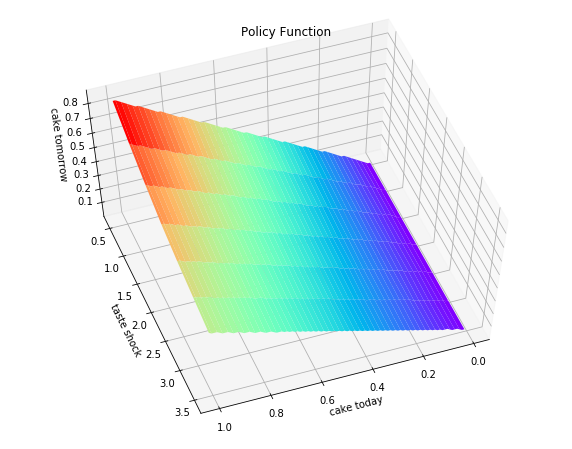

In [30]:
# plot the policy function

print(w_t_2_sol)

X, Y = np.meshgrid(W, pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, w_t_2_sol,cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Policy Function") 
new_ax.view_init(elev=60,azim=70)

[[-9.00000001e+09 -9.00000002e+09 -9.00000003e+09 -9.00000005e+09
  -9.00000006e+09 -9.00000007e+09 -9.00000008e+09]
 [-8.10000004e+09 -8.10000005e+09 -8.10000005e+09 -8.10000005e+09
  -8.10000005e+09 -8.10000006e+09 -8.10000006e+09]
 [-7.29000005e+09 -7.29000005e+09 -7.29000005e+09 -7.29000005e+09
  -7.29000006e+09 -7.29000006e+09 -7.29000006e+09]
 [-1.80522671e+01 -2.03548522e+01 -2.26574373e+01 -2.49600224e+01
  -2.72626075e+01 -2.95651926e+01 -3.18677777e+01]
 [-1.67240843e+01 -1.90266694e+01 -2.13292545e+01 -2.35737280e+01
  -2.55297395e+01 -2.74857511e+01 -2.94417626e+01]
 [-1.56766026e+01 -1.79791877e+01 -2.02817728e+01 -2.22455453e+01
  -2.42015568e+01 -2.61575683e+01 -2.80226347e+01]
 [-1.49038096e+01 -1.72063947e+01 -1.92420520e+01 -2.11980635e+01
  -2.31540750e+01 -2.49411729e+01 -2.66944519e+01]
 [-1.42780030e+01 -1.65132475e+01 -1.84692590e+01 -2.03871333e+01
  -2.21404122e+01 -2.38936912e+01 -2.56469701e+01]
 [-1.37423698e+01 -1.58874409e+01 -1.78434524e+01 -1.96143403e+0

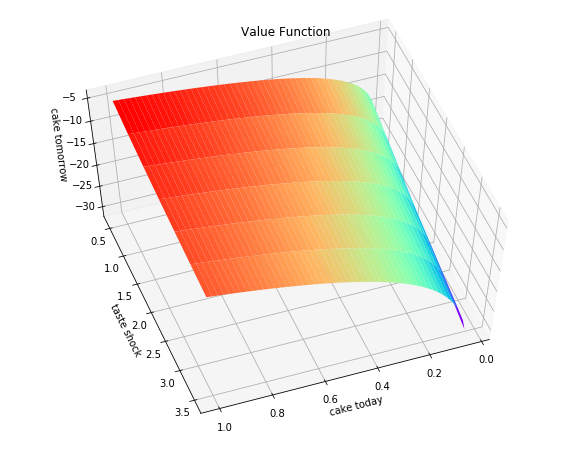

In [31]:
# plot the value function

print(v_t_2_sol)

# When drawing the functions, to make the figure more beautiful, drop the first three plots.

X, Y = np.meshgrid(W[3:], pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, v_t_2_sol[3:],cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Value Function") 
new_ax.view_init(elev=60,azim=70)

In [32]:
# distance_new
d_t_2=dist_3d(v_t_1_sol,v_t_2_sol)
print('Distance between V_T+1 and V_T is ', d_t)
print('Distance between V_T and V_T-1 is ', d_t_1)
print('Distance between V_T-1 and V_T-2 is ', d_t_2)
print('The distance again decreases.')

Distance between V_T+1 and V_T is  5.6700000580251445e+20
Distance between V_T and V_T-1 is  4.592700047000368e+20
Distance between V_T-1 and V_T-2 is  3.7200870380702984e+20
The distance again decreases.


### 5.21

Iter 1: Distance = 5.6700000580251445e+20
Iter 2: Distance = 4.592700047000368e+20
Iter 3: Distance = 3.7200870380702984e+20
Iter 4: Distance = 3.013270500836941e+20
Iter 5: Distance = 2.4407491056779225e+20
Iter 6: Distance = 1.977006775599117e+20
Iter 7: Distance = 1.6013754882352847e+20
Iter 8: Distance = 1.29711414547058e+20
Iter 9: Distance = 1.0506624578311702e+20
Iter 10: Distance = 8.51036590843248e+19
Iter 11: Distance = 6.8933963858303115e+19
Iter 12: Distance = 5.583651072522553e+19
Iter 13: Distance = 4.5227573687432675e+19
Iter 14: Distance = 3.6634334686820475e+19
Iter 15: Distance = 2.9673811096324588e+19
Iter 16: Distance = 2.4035786988022915e+19
Iter 17: Distance = 1.9468987460298564e+19
Iter 18: Distance = 1.576987984284184e+19
Iter 19: Distance = 1.2773602672701886e+19
Iter 20: Distance = 1.034661816488853e+19
Iter 21: Distance = 8.380760713559713e+18
Iter 22: Distance = 6.788416177983365e+18
Iter 23: Distance = 5.498617104166525e+18
Iter 24: Distance = 4.45387985437

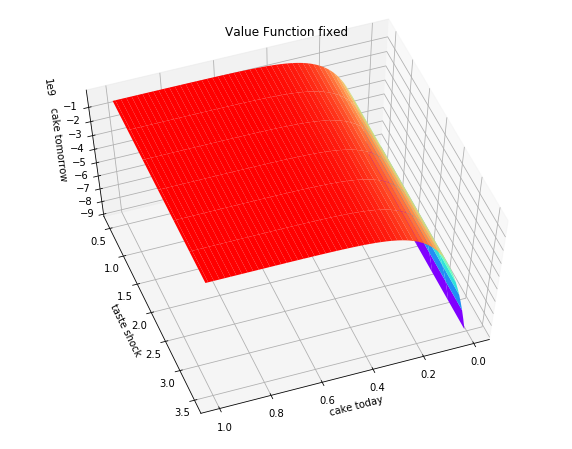

In [33]:
#before the loop

N=100
beta=0.9
W=np.linspace(0.01, 1, 100)
c_dif=(np.tile(W.reshape((N,1)),(1,N)))-(np.tile(W.reshape((1,N)),(N,1)))
c_pos=c_dif>0
c_dif[~c_pos]=1e-10
u_dif=utility(c_dif)
u_3d=np.array([u_dif*i for i in pt])


# loop

# set the maximum iteration as 1000, using j

j=0

v_current=np.zeros((N,M))
distance_3d=1

while distance_3d>1e-9 and j<=1000:
    
    j+=1
    v_prime=v_current
    ev_prime=v_prime.dot(f_pdf.reshape((M,1)))
    ev_prime_matrix=np.tile(ev_prime.reshape((1,N)), (N,1))
    ev_prime_matrix[~c_pos]=-1e10
    ev_prime_3d=np.array([ev_prime_matrix for i in range(M)])
    v_new=u_3d+beta*ev_prime_3d

    #calc the max

    v_new_sol= np.zeros((N,M))
    w_new_sol = np.zeros((N,M))

    for i in range(N):
        v_new_1= v_new[:, i, :]
        v_new_sol[i]=v_new_1.max(axis=1)
        ind = np.argmax(v_new_1, axis=1)
        w_new_sol[i]=W[ind]
    
    distance_3d=dist_3d(v_current,v_new_sol)
    print ('Iter {}: Distance = {}'.format(j,distance_3d))
    v_current=v_new_sol

# plot the fixed value function

X, Y = np.meshgrid(W, pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, v_new_sol,cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Value Function fixed") 
new_ax.view_init(elev=60,azim=70)

It takes 101 iterations to converge. 

### 5.22

In [26]:
w_new_sol
%matplotlib notebook

NameError: name 'w_new_sol' is not defined

<IPython.core.display.Javascript object>


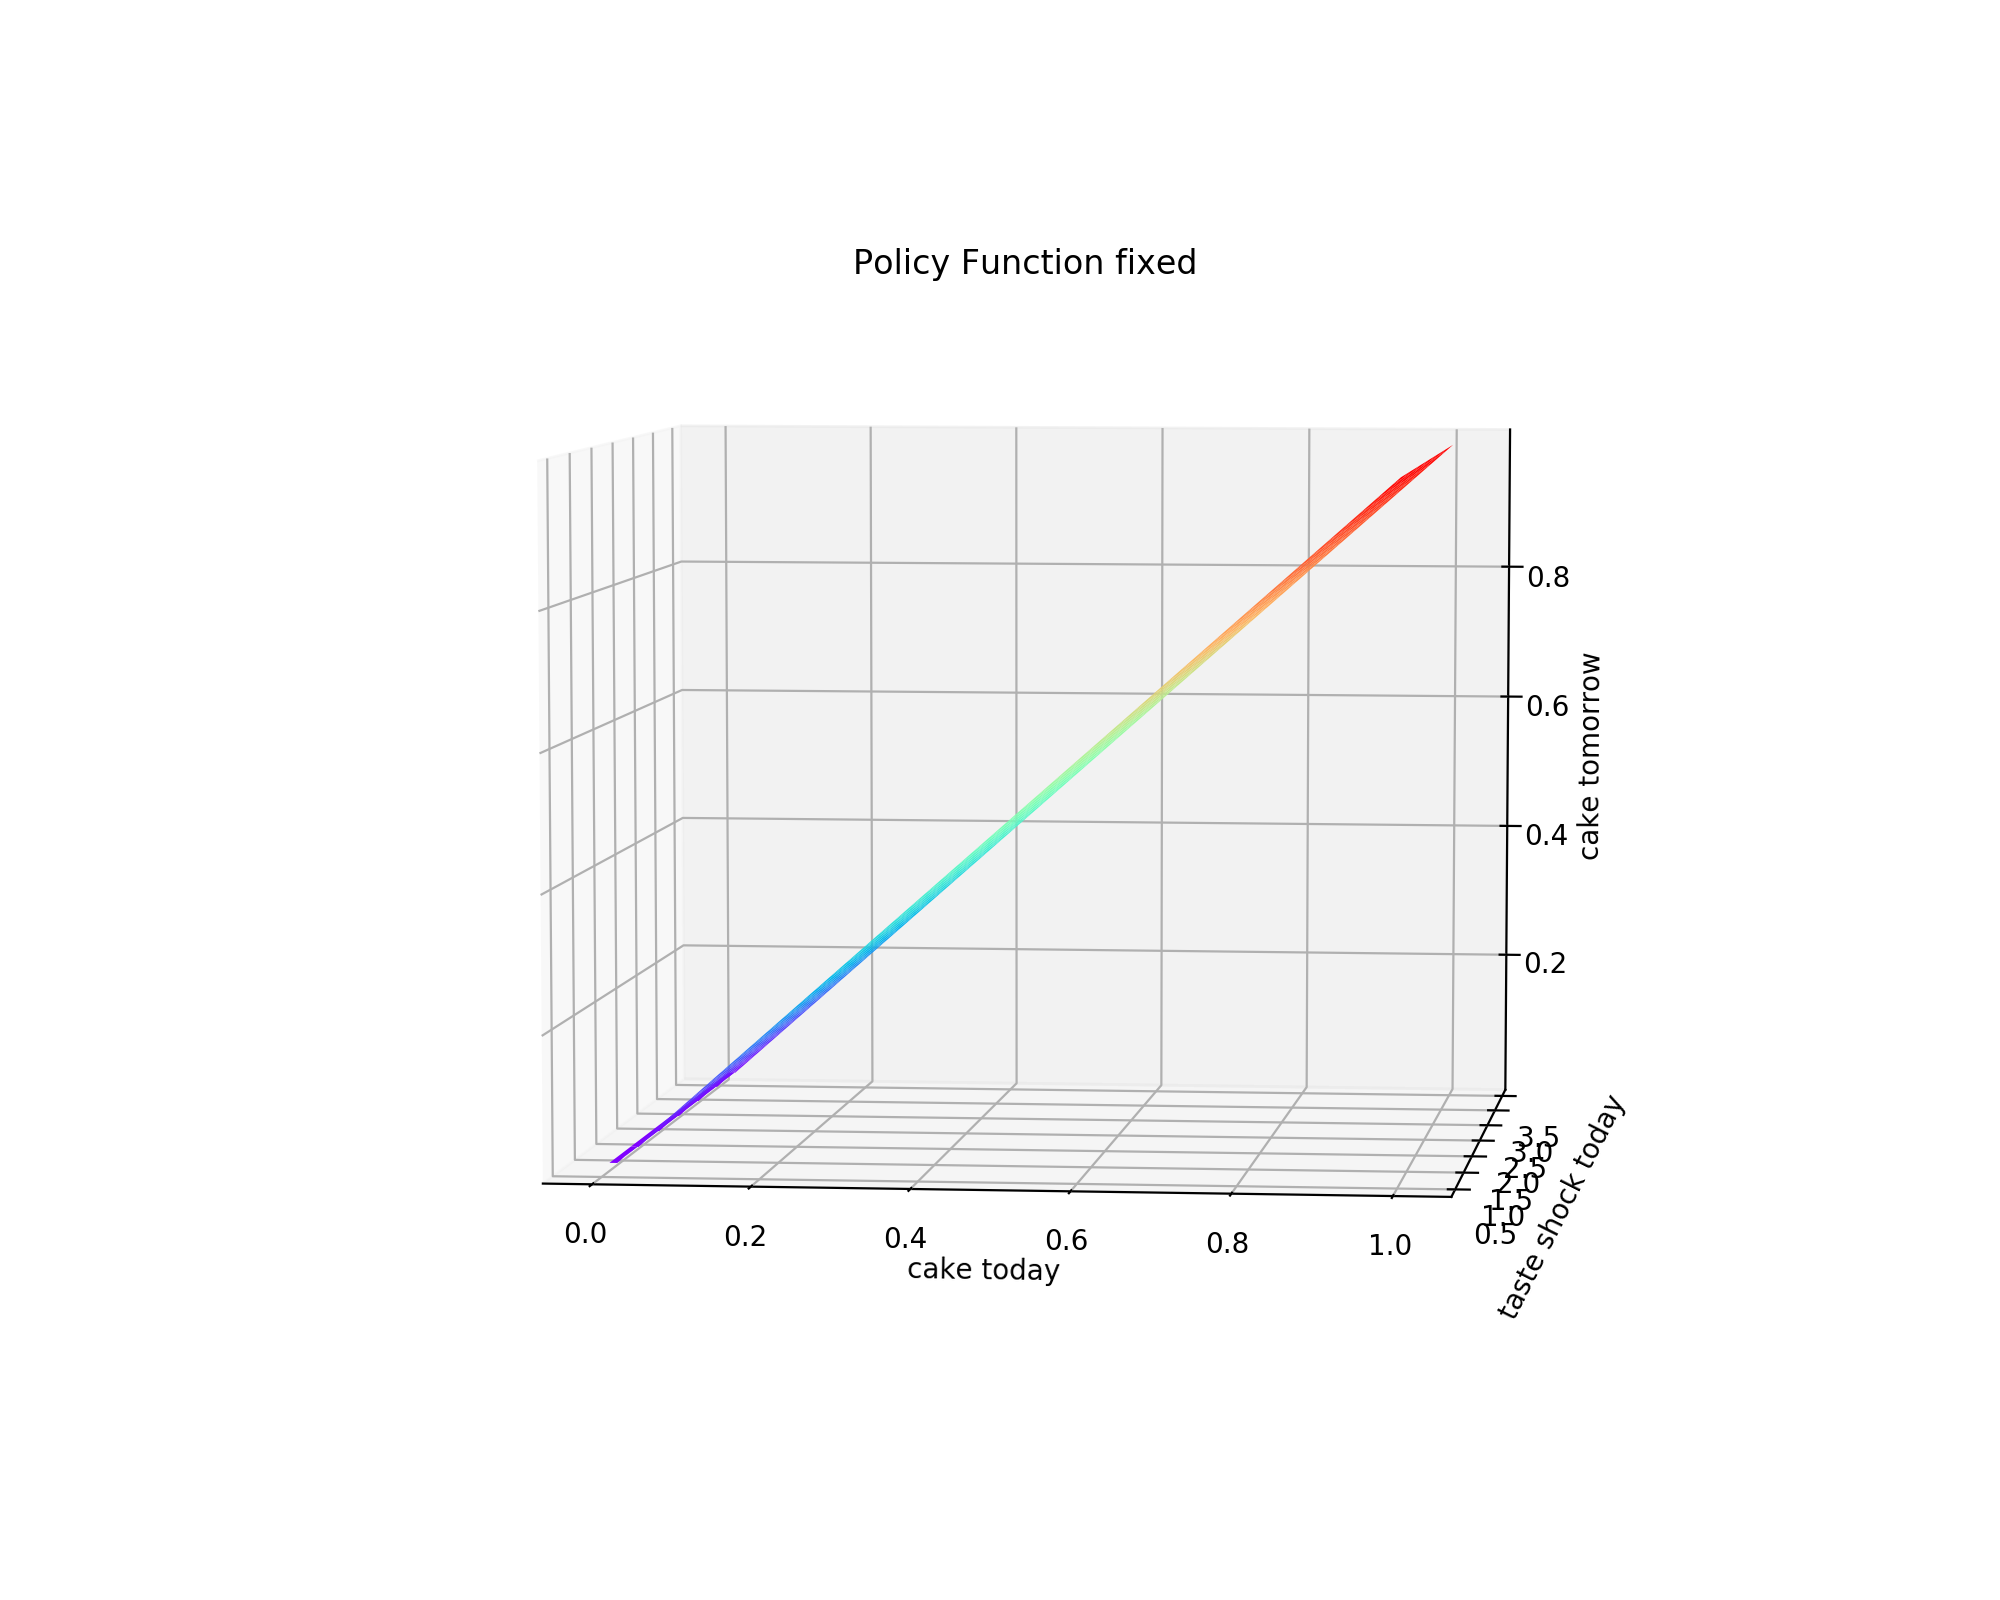

In [35]:
X, Y = np.meshgrid(W, pt)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, w_new_sol,cmap=cm.rainbow)
new_ax.set_xlabel('cake today')
new_ax.set_ylabel('taste shock today')
new_ax.set_zlabel('cake tomorrow')
new_ax.set_title("Policy Function fixed") 
new_ax.view_init(elev=60,azim=70)